# EOFs feedbacks analysis in CNRM-CM6-1 PPE
Here we want to read the global annual mean of the radiative budget and air surface temperature in the amip and amip-futre4K PPE. We then compute the global feedbacks over the five years simulated, and carry out an EOF analysis in oder to identify the leading patterns of feedback response. The input of this EOF analysis consists of the feedbacks anomaly matrix (N members x lat/lon position). 

# Importe modules

In [40]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# Read files : radiative budget, tas

In [3]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip experiment : 

path=path_official
filename='*_amip_*.nc'
official_amip = get_3D_xarr(path, filename, variables)
official_amip_SW = get_3D_SW_xarr(path, filename, variables)
official_amip_LW = get_3D_LW_xarr(path, filename, variables)

path=path_PPE+'CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1p1f2/'
p1_amip = get_3D_xarr(path, filename, variables)
p1_amip_SW = get_3D_SW_xarr(path, filename, variables)
p1_amip_LW = get_3D_LW_xarr(path, filename, variables)


nb_p_list = ['p105',  'p30',  'p65', 'p15', 'p109',  'p160',  'p34', 'p111', \
            'p36', 'p122',  'p39',  'p83', 'p123', 'p88', 'p184', 'p131',  'p49', \
            'p133',  'p193', 'p13',  'p195',  'p93', 'p140',    'p57', 'p142',   'p58', \
            'p144', 'p148', 'p14',   'p65', 'p209', 'p216', 'p218', 'p222', 'p227', 'p244', \
            'p245', 'p249', 'p254', 'p255', 'p262', 'p269', 'p279', 'p281', 'p287', 'p294', \
            'p297', 'p2', 'p4']
N=len(nb_p_list)
amip={}
amip_SW={}
amip_LW={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1'+str(nb_p)+'f2/'
    amip[str(nb_p)] = get_3D_xarr(path, filename, variables)
    amip_SW[str(nb_p)] = get_3D_SW_xarr(path, filename, variables)
    amip_LW[str(nb_p)] = get_3D_LW_xarr(path, filename, variables)
    i=i+1

p105
p30
p65
p15
p109
p160
p34
p111
p36
p122
p39
p83
p123
p88
p184
p131
p49
p133
p193
p13
p195
p93
p140
p57
p142
p58
p144
p148
p14
p65
p209
p216
p218
p222
p227
p244
p245
p249
p254
p255
p262
p269
p279
p281
p287
p294
p297
p2
p4


In [4]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip-future4K experiment : 

path=path_official
filename='*_amip-future4K_*.nc'
official_future4K = get_3D_xarr(path, filename, variables)
official_future4K_SW = get_3D_SW_xarr(path, filename, variables)
official_future4K_LW = get_3D_LW_xarr(path, filename, variables)

path=path_PPE+'CNRM-CM6-1_amip-future4K_PPE/CNRM-CM6-1_amip-future4K_r1i1p1f2/'
p1_future4K = get_3D_xarr(path, filename, variables)
p1_future4K_SW = get_3D_SW_xarr(path, filename, variables)
p1_future4K_LW = get_3D_LW_xarr(path, filename, variables)


nb_p_list = ['p105',  'p30',  'p65', 'p15', 'p109',  'p160',  'p34', 'p111', \
            'p36', 'p122',  'p39',  'p83', 'p123', 'p88', 'p184', 'p131',  'p49', \
            'p133',  'p193', 'p13',  'p195',  'p93', 'p140',    'p57', 'p142',   'p58', \
            'p144', 'p148', 'p14',   'p65', 'p209', 'p216', 'p218', 'p222', 'p227', 'p244', \
            'p245', 'p249', 'p254', 'p255', 'p262', 'p269', 'p279', 'p281', 'p287', 'p294', \
            'p297', 'p2', 'p4']
N=len(nb_p_list)
future4K={}
future4K_SW={}
future4K_LW={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip-future4K_PPE/CNRM-CM6-1_amip-future4K_r1i1'+str(nb_p)+'f2/'
    future4K[str(nb_p)] = get_3D_xarr(path, filename, variables)
    future4K_SW[str(nb_p)] = get_3D_SW_xarr(path, filename, variables)
    future4K_LW[str(nb_p)] = get_3D_LW_xarr(path, filename, variables)
    i=i+1

p105
p30
p65
p15
p109
p160
p34
p111
p36
p122
p39
p83
p123
p88
p184
p131
p49
p133
p193
p13
p195
p93
p140
p57
p142
p58
p144
p148
p14
p65
p209
p216
p218
p222
p227
p244
p245
p249
p254
p255
p262
p269
p279
p281
p287
p294
p297
p2
p4


# Compute : Delta(TOA), Delta(tas), Lambda

In [53]:
# We want to compute the Deltas and the feedbacks of each perturbations (amip - amip-future4K)

nb_p_list = ['p105',  'p30',  'p65', 'p15', 'p109',  'p160',  'p34', 'p111', \
            'p36', 'p122',  'p39',  'p83', 'p123', 'p88', 'p184', 'p131',  'p49', \
            'p133',  'p193', 'p13',  'p195',  'p93', 'p140',    'p57', 'p142',   'p58', \
            'p144', 'p148', 'p14',   'p65', 'p209', 'p216', 'p218', 'p222', 'p227', 'p244', \
            'p245', 'p249', 'p254', 'p255', 'p262', 'p269', 'p279', 'p281', 'p287', 'p294', \
            'p297', 'p2', 'p4']

N=len(nb_p_list)

SW=[0]*(N+1)
LW=[0]*(N+1)

official_Delta_tas = official_future4K['tas'] - official_amip['tas']
official_Delta_SW = official_future4K_SW - official_amip_SW
official_Delta_LW = official_future4K_LW - official_amip_LW
SW[0] = official_Delta_SW/official_Delta_tas
LW[0] = official_Delta_LW/official_Delta_tas

#p1_Delta_tas = p1_future4K['tas'] - p1_amip['tas']
#p1_Delta_SW = p1_future4K_SW - p1_amip_SW
#p1_Delta_LW = p1_future4K_LW - p1_amip_LW
#SW[1] = p1_Delta_SW/p1_Delta_tas
#LW[1] = p1_Delta_LW/p1_Delta_tas


i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    Delta_tas = future4K[str(nb_p)]['tas'] - amip[str(nb_p)]['tas']
    Delta_SW = future4K_SW[str(nb_p)] - amip_SW[str(nb_p)] 
    Delta_LW = future4K_LW[str(nb_p)] - amip_LW[str(nb_p)] 
    j=i+1
    SW[j] = Delta_SW/Delta_tas
    LW[j] = Delta_LW/Delta_tas
    i=i+1

p105
p30
p65
p15
p109
p160
p34
p111
p36
p122
p39
p83
p123
p88
p184
p131
p49
p133
p193
p13
p195
p93
p140
p57
p142
p58
p144
p148
p14
p65
p209
p216
p218
p222
p227
p244
p245
p249
p254
p255
p262
p269
p279
p281
p287
p294
p297
p2
p4


# Create EOF input matrix

In [54]:
SW_matrix = xr.combine_nested(SW, concat_dim=['time'])
SW_matrix

<xarray.DataArray (time: 50, lat: 128, lon: 256)>
dask.array<concatenate, shape=(50, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: time

In [89]:
LW_matrix = xr.combine_nested(LW, concat_dim=['time'])
LW_matrix

<xarray.DataArray (time: 50, lat: 128, lon: 256)>
dask.array<concatenate, shape=(50, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: time

In [28]:
ds1 = SW_matrix.to_dataset(name='SW')
ds2 = LW_matrix.to_dataset(name='LW')

Fd = [ds1, ds2]
#FD = xr.combine_by_coords(Fd)
FD = xr.combine_nested(Fd, concat_dim=['lat', 'lon'])
#FD1 = FD.to_array()
#Feedbacks = FD1
FD

<xarray.DataArray 'stack-65733f9bd2d860c6163ced6e917e183c' (variable: 2, time: 51, lat: 128, lon: 256)>
dask.array<stack, shape=(2, 51, 128, 256), dtype=float32, chunksize=(1, 1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height    float64 2.0
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * variable  (variable) <U2 'LW' 'SW'
Dimensions without coordinates: time

# EOF analysis SW feedbacks

In [55]:
# Create an EOF solver to do the EOF analysis. 
solver = Eof(SW_matrix)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SW feedbacks at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

In [63]:
varFrac_1 = solver.varianceFraction(neigs=1)
varFrac_1

<xarray.DataArray 'variance_fractions' (mode: 1)>
array([0.49327025], dtype=float32)
Coordinates:
  * mode     (mode) int64 0
Attributes:
    long_name:  variance_fractions

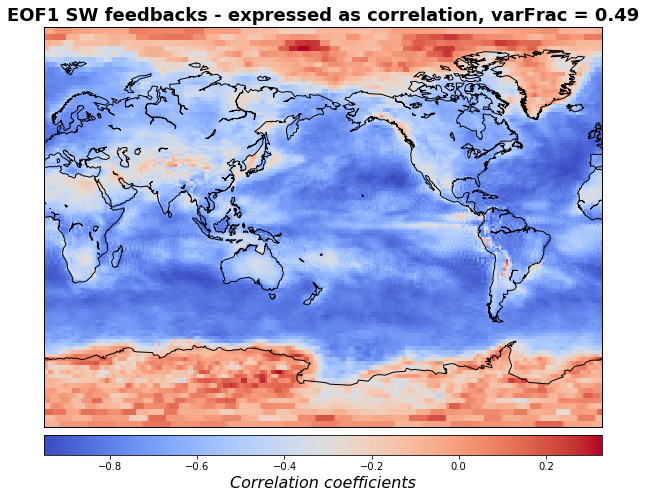

In [121]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = eof1['lat'][:]
lon = eof1['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof1[0]
ax.set_title("EOF1 SW feedbacks - expressed as correlation, varFrac = 0.49", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)

cbar = m.colorbar(location='bottom', spacing = 'uniform')
cbar.set_ticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
#cbar.set_ticklabels([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
cbar.set_label('Correlation coefficients', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF1map_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

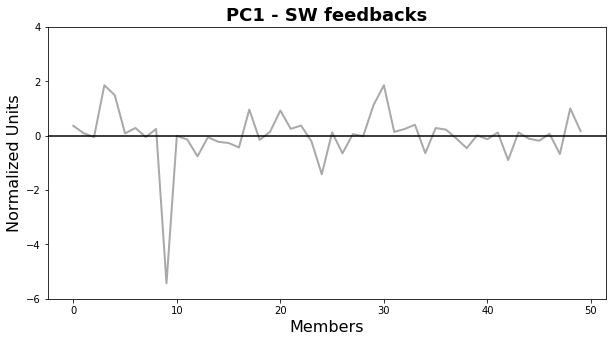

In [78]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc1[:, 0].plot(color='darkgray', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-6, 4)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC1 - SW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF1pc_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [69]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof3 = solver.eofsAsCorrelation(neofs=3)
pc3 = solver.pcs(npcs=3, pcscaling=1)

In [73]:
varFrac_3 = solver.varianceFraction(neigs=3)
varFrac_3

<xarray.DataArray 'variance_fractions' (mode: 3)>
array([0.49327025, 0.1586374 , 0.05337491], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  variance_fractions

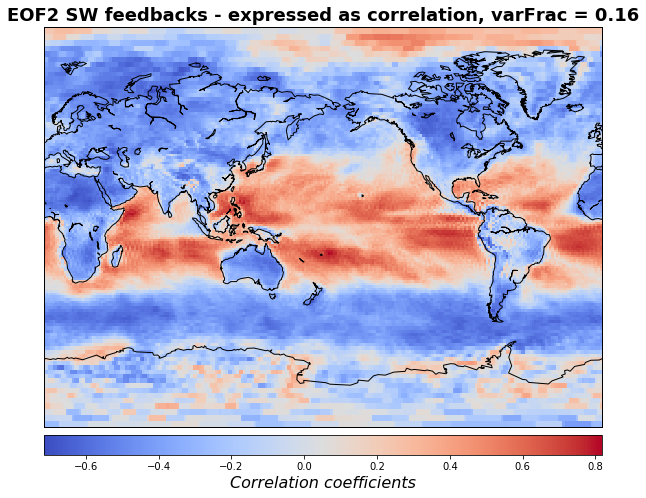

In [79]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = eof1['lat'][:]
lon = eof1['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof3[1]
ax.set_title("EOF2 SW feedbacks - expressed as correlation, varFrac = 0.16", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform')
#cbar.set_ticks(np.arange(230,10,300))
cbar.set_label ('Correlation coefficients', size = 16, style = 'italic')
m.drawcoastlines()
m.drawmapboundary()

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF2map_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

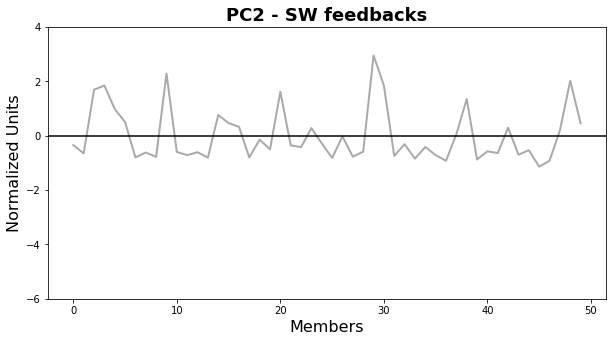

In [80]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc3[:, 1].plot(color='darkgray', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-6, 4)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC2 - SW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF2pc_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

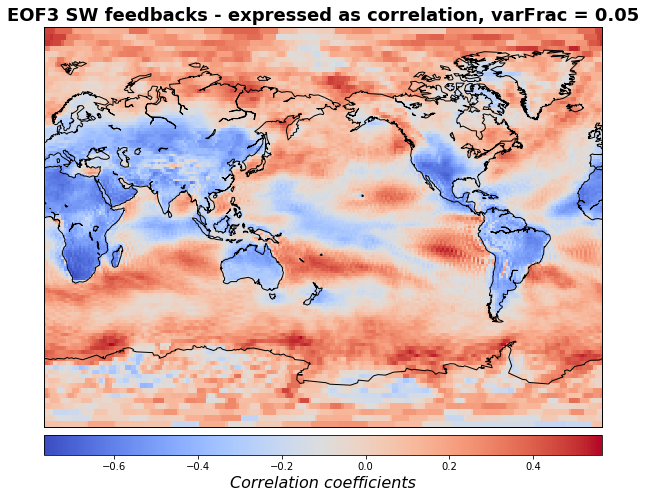

In [81]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = eof1['lat'][:]
lon = eof1['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof3[2]
ax.set_title("EOF3 SW feedbacks - expressed as correlation, varFrac = 0.05", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform')
#cbar.set_ticks(np.arange(230,10,300))
cbar.set_label ('Correlation coefficients', size = 16, style = 'italic')
m.drawcoastlines()
m.drawmapboundary()

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF3map_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

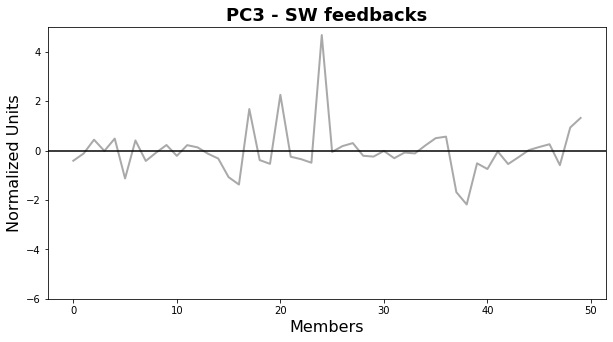

In [82]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc3[:, 2].plot(color='darkgray', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-6, 5)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC3 - SW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF3pc_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

# EOF analysis LW feedbacks

In [90]:
# Create an EOF solver to do the EOF analysis. 
solver = Eof(LW_matrix)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof3 = solver.eofsAsCorrelation(neofs=3)
pc3 = solver.pcs(npcs=3, pcscaling=1)
varFrac_3 = solver.varianceFraction(neigs=3)
varFrac_3

<xarray.DataArray 'variance_fractions' (mode: 3)>
array([0.44520313, 0.15050146, 0.05838032], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  variance_fractions

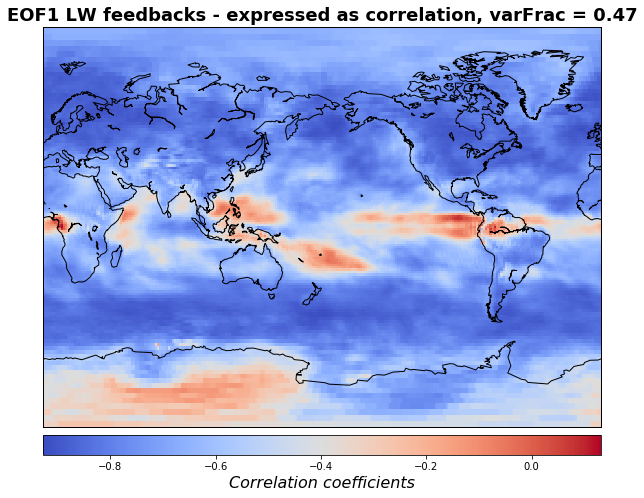

In [91]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = eof3['lat'][:]
lon = eof3['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof3[0]
ax.set_title("EOF1 LW feedbacks - expressed as correlation, varFrac = 0.47", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform')
#cbar.set_ticks(np.arange(230,10,300))
cbar.set_label ('Correlation coefficients', size = 16, style = 'italic')
m.drawcoastlines()
m.drawmapboundary()

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF1map_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

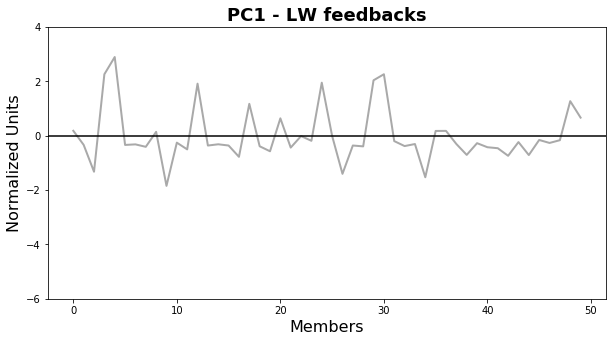

In [122]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc3[:, 0].plot(color='darkgray', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-6, 4)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC1 - LW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF1pc_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

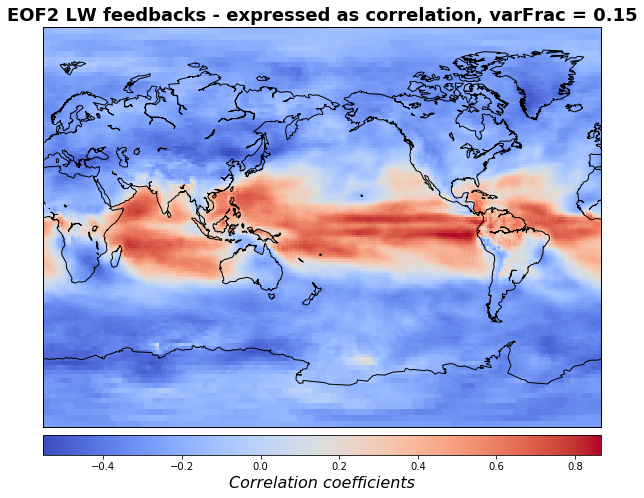

In [123]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = eof3['lat'][:]
lon = eof3['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof3[1]
ax.set_title("EOF2 LW feedbacks - expressed as correlation, varFrac = 0.15", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform')
#cbar.set_ticks(np.arange(230,10,300))
cbar.set_label ('Correlation coefficients', size = 16, style = 'italic')
m.drawcoastlines()
m.drawmapboundary()

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF2map_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

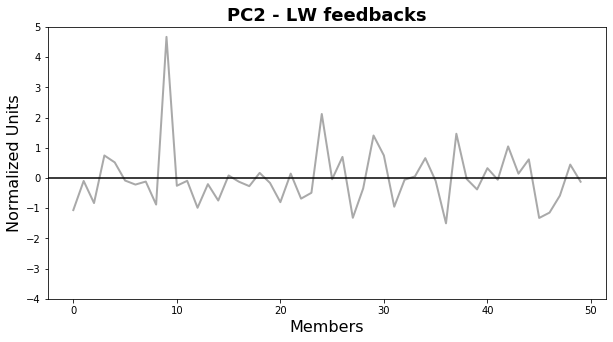

In [125]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc3[:, 1].plot(color='darkgray', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-4, 5)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC2 - LW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF2pc_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

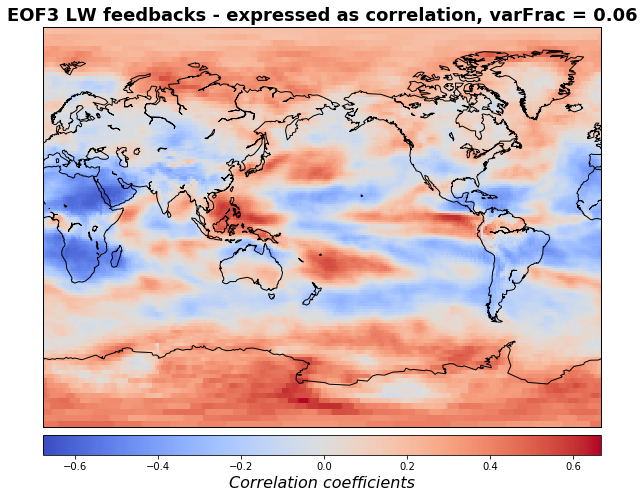

In [126]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = eof3['lat'][:]
lon = eof3['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof3[2]
ax.set_title("EOF3 LW feedbacks - expressed as correlation, varFrac = 0.06", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform')
#cbar.set_ticks(np.arange(230,10,300))
cbar.set_label ('Correlation coefficients', size = 16, style = 'italic')
m.drawcoastlines()
m.drawmapboundary()

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF3map_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

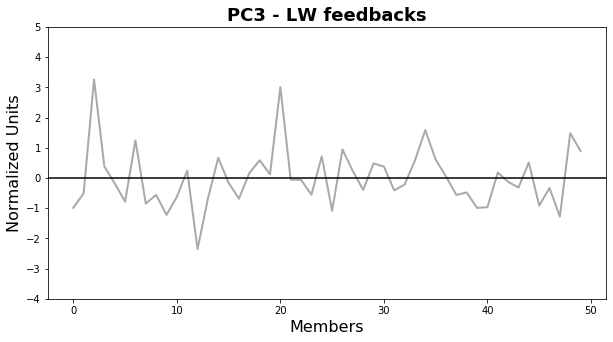

In [127]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc3[:, 2].plot(color='darkgray', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-4, 5)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC3 - LW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_EOF3pc_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()